<img src="Logo_ESPRIT.jpg" width="300" align="right"></a>


<h1 align="center"><font size="5">Projet Machine Learning</font></h1>

Ce Porjet doit être rédigé et sera évalué. Le code python produit doit être inclus. Pour la mise en page et le format, il est préférable de le rendre sous la forme d’un notebook Jupyter, ou alors d’un document pdf. Les noms doivent apparaître dans le document. Il doit être envoyé le ../../ 2023 au plus tard à l’adresse suivante.
mohamedhedi.riahi@esprit.tn 

# Objectif du projet
L'objectif de ce projet est de:

- Comprendre les données en faisant des graphiques, utilisant pandas,...
- Faire la Préparation des données nettoyage, encodage, normalisation et etc ... 
- Faire l'étape de feautres selection.
- Tester 8 algorithmes de classification (K_nearst neighbors, Arbre de décision, Régression Logistique, Naive Bayes ,SVM, Random Forest, Xgboost,neural network) pour la résolution d'un problème de classification binaire(deux classes)
- Régler le maximum de paramètres pour chaque algorithme
- Tracer la matrice de confusion et afficher __classification_report__ de chaque algorithme
- Choisir le meilleur algorithme en utilisant __classification_report__
- Tracer les courbes ROC et calculer Auc pour les algorithmes.

# Base de données __Predicting Credit Card Defaul__

Cette recherche a porté sur le cas des défauts de paiement des clients(les crédits) à Taïwan et compare l'exactitude prédictive de la probabilité de défaut parmi des méthodes d'exploration de données.
    

    
 <p>vous pouvez consulter le fichier sur ce lien:
    (<a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">click ici</a>)  
    <br><br>
Cette recherche a utilisé une variable binaire, le paiement par défaut X24: Paiement par défaut (1=clients crédibles, 0=clients non crédibles) (Oui = 1, Non =0), comme variable de réponse.<br><br>Cette étude a passé en revue la littérature et a utilisé les 23 variables suivantes comme variables explicatives :<br><br>
X1 : Montant du crédit accordé (dollar NT) : il comprend à la fois le crédit à la consommation individuel et son crédit (supplémentaire) familial.<br>
X2 : Sexe (1 = masculin ; 2 = féminin).<br>
X3 : Éducation (1 = études supérieures ; 2 = université ; 3 = lycée ; 4 = autres).<br>
X4 : Etat civil (1 = marié ; 2 = célibataire ; 3 = autres).<br>
X5 : Âge (année).<br>
X6 - X11 : Historique des paiements passés. Nous avons suivi les derniers relevés de paiements mensuels (d'avril à septembre 2005) comme suit : X6 = le statut de remboursement en septembre 2005 ; X7 = l'état du remboursement en août 2005 ; . . .;X11 = l'état de remboursement en avril 2005. L'échelle de mesure de l'état de remboursement est : -1 = payer en bonne et due forme ; 1 = retard de paiement d'un mois ; 2 = retard de paiement de deux mois ; . . .; 8 = retard de paiement de huit mois ; 9 = retard de paiement de neuf mois et plus.<br>
X12-X17 : Montant du relevé de facture (dollar NT). X12 = montant du relevé de facture en septembre 2005 ; X13 = montant du relevé de facture en août 2005 ; . . .; X17 = montant du relevé de facture en avril 2005.<br>
X18-X23 : Montant du paiement précédent (dollar NT). X18 = montant payé en septembre 2005 ; X19 = montant payé en août 2005 ; . . .;X23 = montant payé en avril 2005.<br>

<center style="color:red">on peut catégoriser les clients entre defaulters (qui ont des crédits)"y=1" et non defaulters "y=0"</center>

# Data understanding

In [2]:
# Chargement des bibliothèques
# importer bibliothèque 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import warnings # supress warnings
warnings.filterwarnings('ignore')

### Importer l'ensemble de données :  default_of_credit_card_clients.xls

In [3]:
df = pd.read_excel('default_of_credit_card_clients.xls',header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Question : Créer une variable `data` à qui vous affectez la base de données 

`default_of_credit_card_clients.xls`

In [6]:
data=df

In [50]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Question : Quelle est la dimension de `data`?

In [51]:
data.shape

(30000, 25)

#### Question :  En utilisant la méthode `head` (resp la méthode `tail` ) afiicher les trois premières lignes de `data`(resp les trois dérnières lignes de `data`)

In [6]:
data.head(3)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [7]:
data.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


#### Question : Dans un seul fichier afficher les statistiques nécessaires pour `data` 

In [8]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Question : Quelle est la nouvelle dimension de `data`?

#### Question: Utiliser la methode .nunique () pour compter le nombre de valeurs uniques qui se produisent dans une base de données ou dans une colonne

In [9]:
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Question: Obtenez la corrélation de "default payment next month" avec d'autres variables:

In [11]:
corr = data.corr()['default payment next month']
corr

ID                           -0.013952
LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment nex

#### Question: Faire la comparaison des distributions avec un boxplot par rapport au variable cible 'default payment next month'

<AxesSubplot:xlabel='default payment next month', ylabel='PAY_0'>

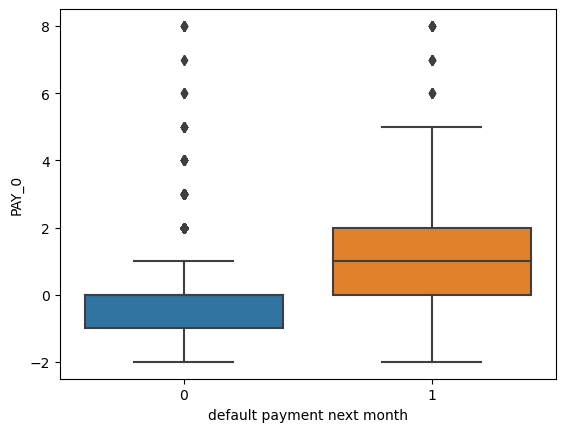

In [12]:
sns.boxplot(x='default payment next month', y='ID', data=data )

#### Question: Pour voir les relations entre ces caractéristiques, faire des graphiques par paire :

In [13]:
#sns.pairplot(data=data, hue='default payment next month')

#### Question: Tracer avec seaborn un graphe qui permet de voir une idée sur la correlation entre la variable 'default payment next month' et les autres variables

<AxesSubplot:>

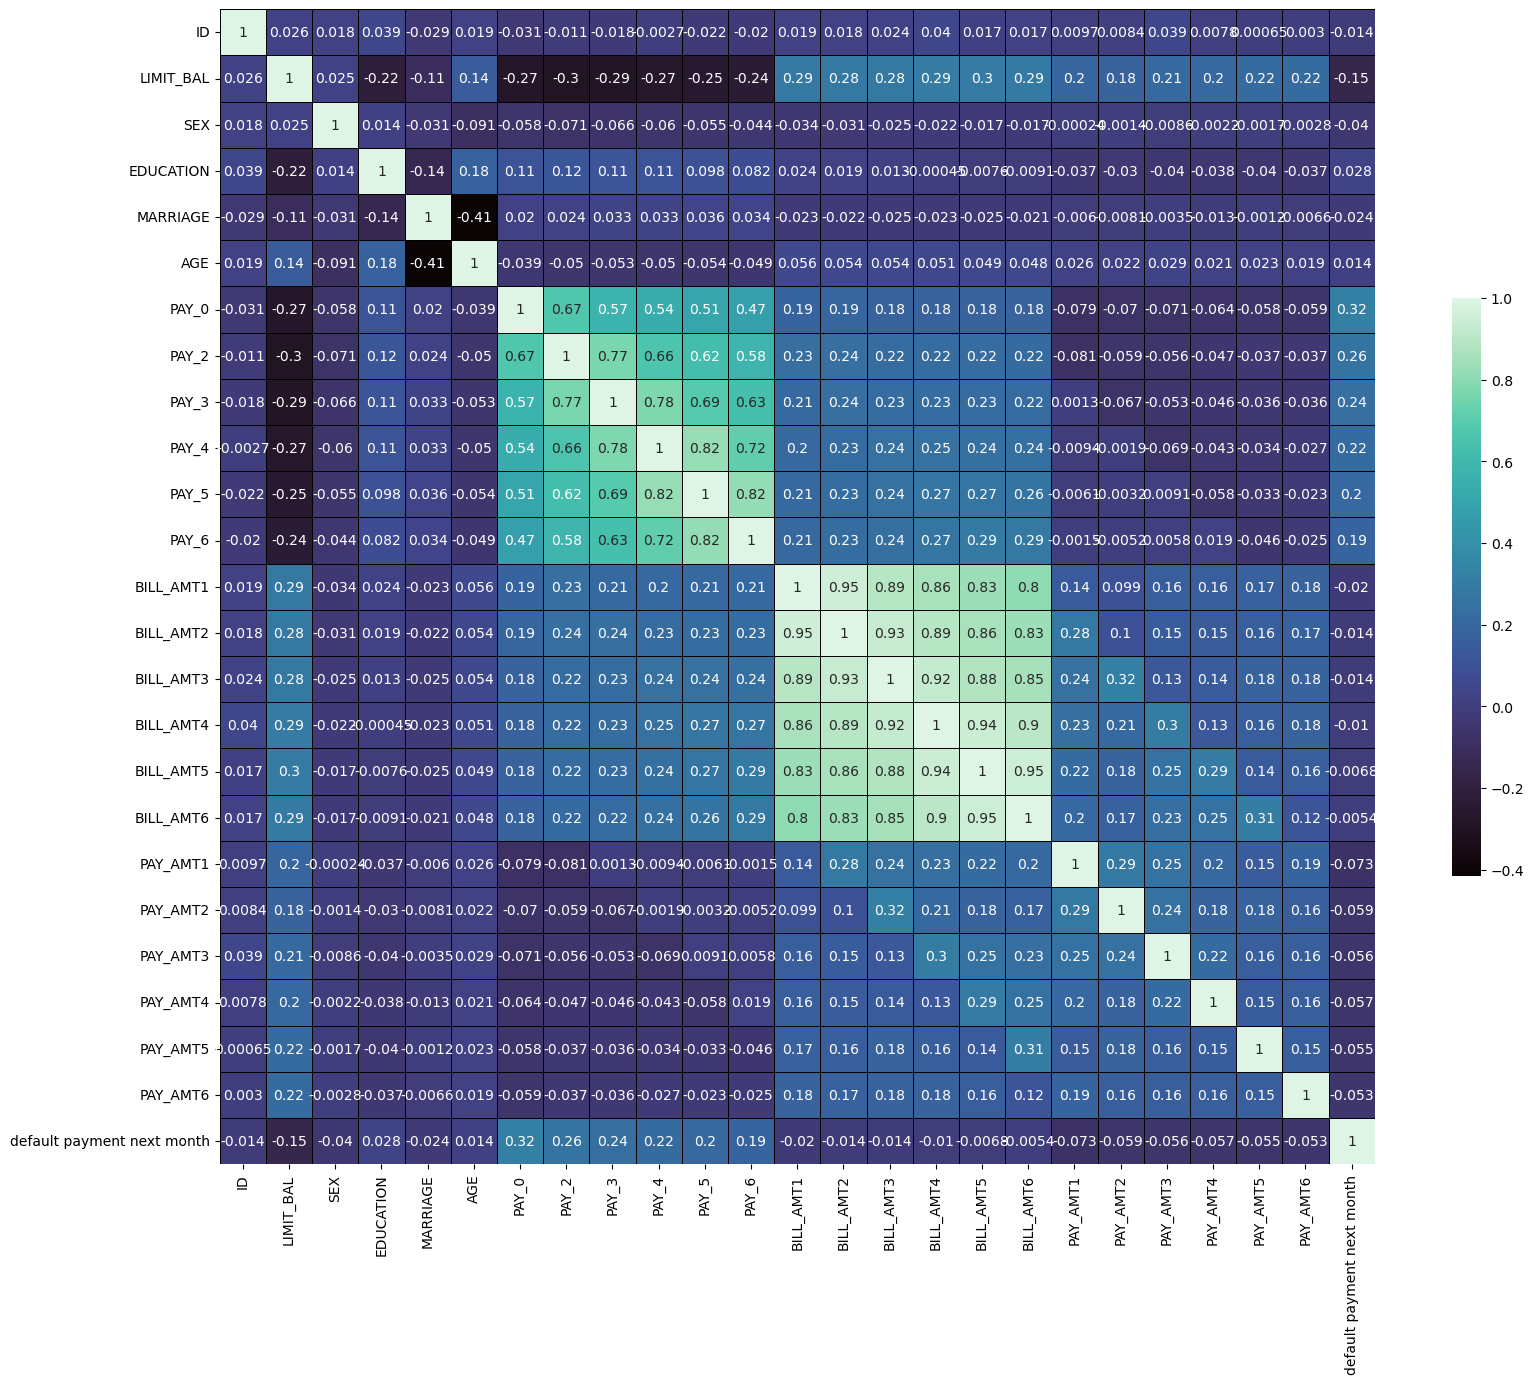

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='mako', linewidths=0.5, linecolor='black', square=True, cbar_kws={"shrink": 0.5})

#### Question : Faire la sélection des feautres avec différentes méthodes: SelectKBest, correlation, Recursive Feature Elimination (RFE), VarianceThreshold...

In [1]:
X=data.drop(['default payment next month'],axis=1)
y=data[['default payment next month']]

NameError: name 'data' is not defined

1-Using VarianceThreshold

In [84]:
 #Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

In [85]:
# Perform feature selection using a variance threshold
#from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.8))
sel.fit(X)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(X.columns[sel.get_support()]))
print("Variables supprimées :", list(X.columns[~sel.get_support()]))

Sélection de variables : [ True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
Variables sélectionnées : ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Variables supprimées : ['SEX', 'EDUCATION', 'MARRIAGE']


2- SelectKBest

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  


kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(X,y)

print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support()]))
print("Variables supprimées :", list(X.columns[kbest.get_support()]))

Sélection de variables : [False False False False False False  True  True  True  True  True False
 False False False False False False False False False False False False]
Scores de variables : [5.84045889e+00 7.24068539e+02 4.79788543e+01 2.35471118e+01
 1.77812714e+01 5.78855582e+00 3.53771497e+03 2.23916914e+03
 1.75746644e+03 1.47684597e+03 1.30459118e+03 1.08540249e+03
 1.15805315e+01 6.04423789e+00 5.94438771e+00 3.09474518e+00
 1.37108740e+00 8.65820292e-01 1.60403810e+02 1.03291524e+02
 9.52180109e+01 9.71880005e+01 9.14298008e+01 8.50890453e+01]
Variables sélectionnées: ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']
Variables supprimées : ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']


3- Correlation

In [87]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [88]:
cf = correlatedFeatures(X, 0.)
cf

{'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'EDUCATION',
 'LIMIT_BAL',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX'}

Choose Optimal Features

In [86]:
X=data.drop(['default payment next month','SEX', 'EDUCATION', 'MARRIAGE','ID'],axis=1)
y=data[['default payment next month']]




<AxesSubplot:>

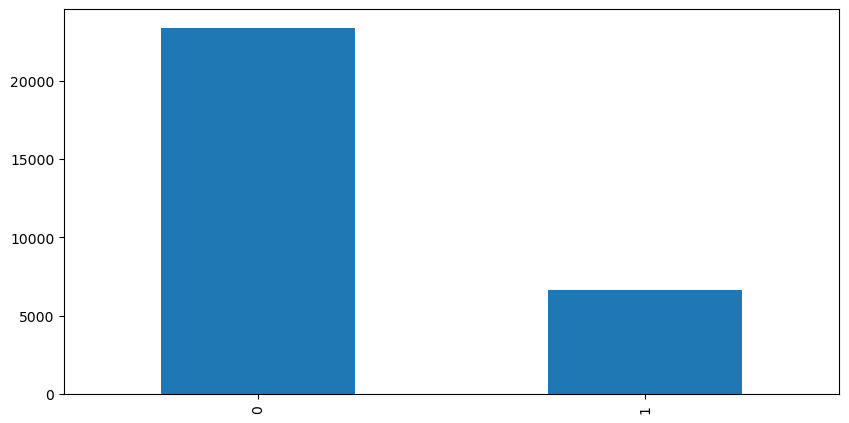

In [87]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))

y['default payment next month'].value_counts().plot(kind='bar', ax=ax1)

SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
sm = SMOTE()
X, y = sm.fit_resample(X, y)

# Create a balanced DataFrame
data_resembled = pd.concat([X, y], axis=1)

<AxesSubplot:>

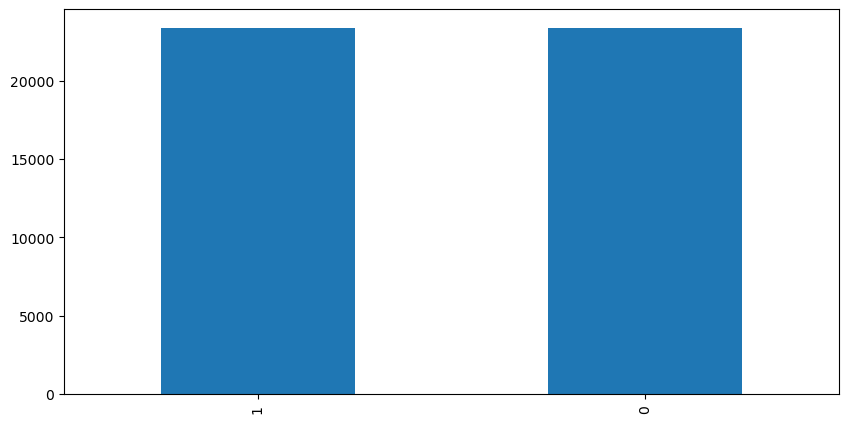

In [89]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))

y['default payment next month'].value_counts().plot(kind='bar', ax=ax1)

RobustScaler

In [72]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Transform and fit the selected features using the scaler
X_s=scaler.fit_transform(X)
X = pd.DataFrame(X_s, columns=X.columns)

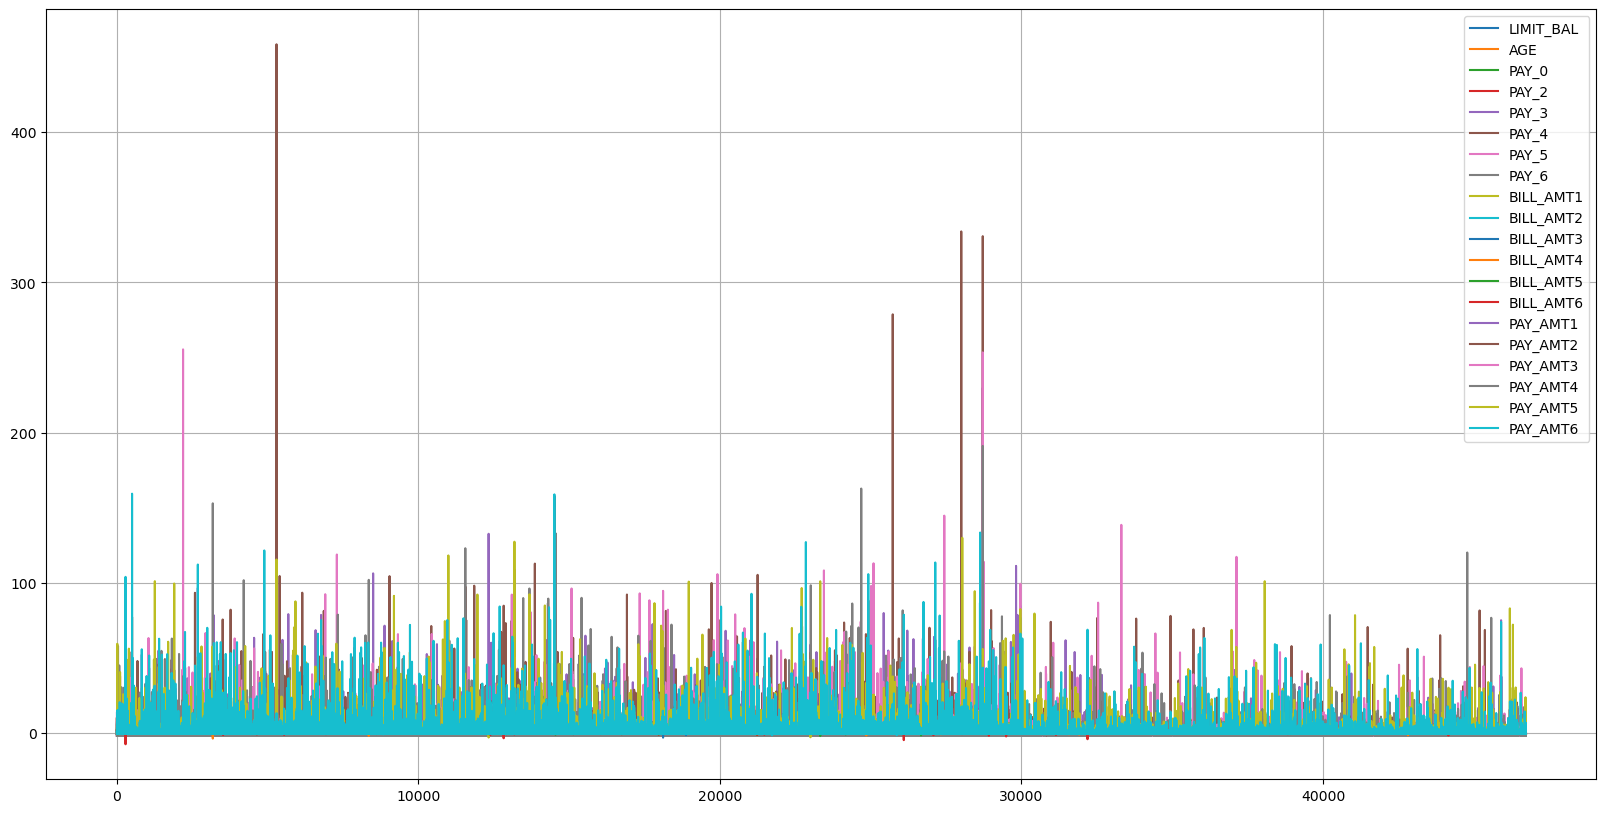

In [73]:
plt.figure(figsize=(20,10))
plt.plot(X)
plt.legend(X.columns)
plt.grid(True)
plt.show()

StandardScaler

In [90]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Create a StandardScaler object
scaler = StandardScaler()
# Transform and fit the selected features using the scaler
X_s=scaler.fit_transform(X)
X = pd.DataFrame(X_s, columns=X.columns)

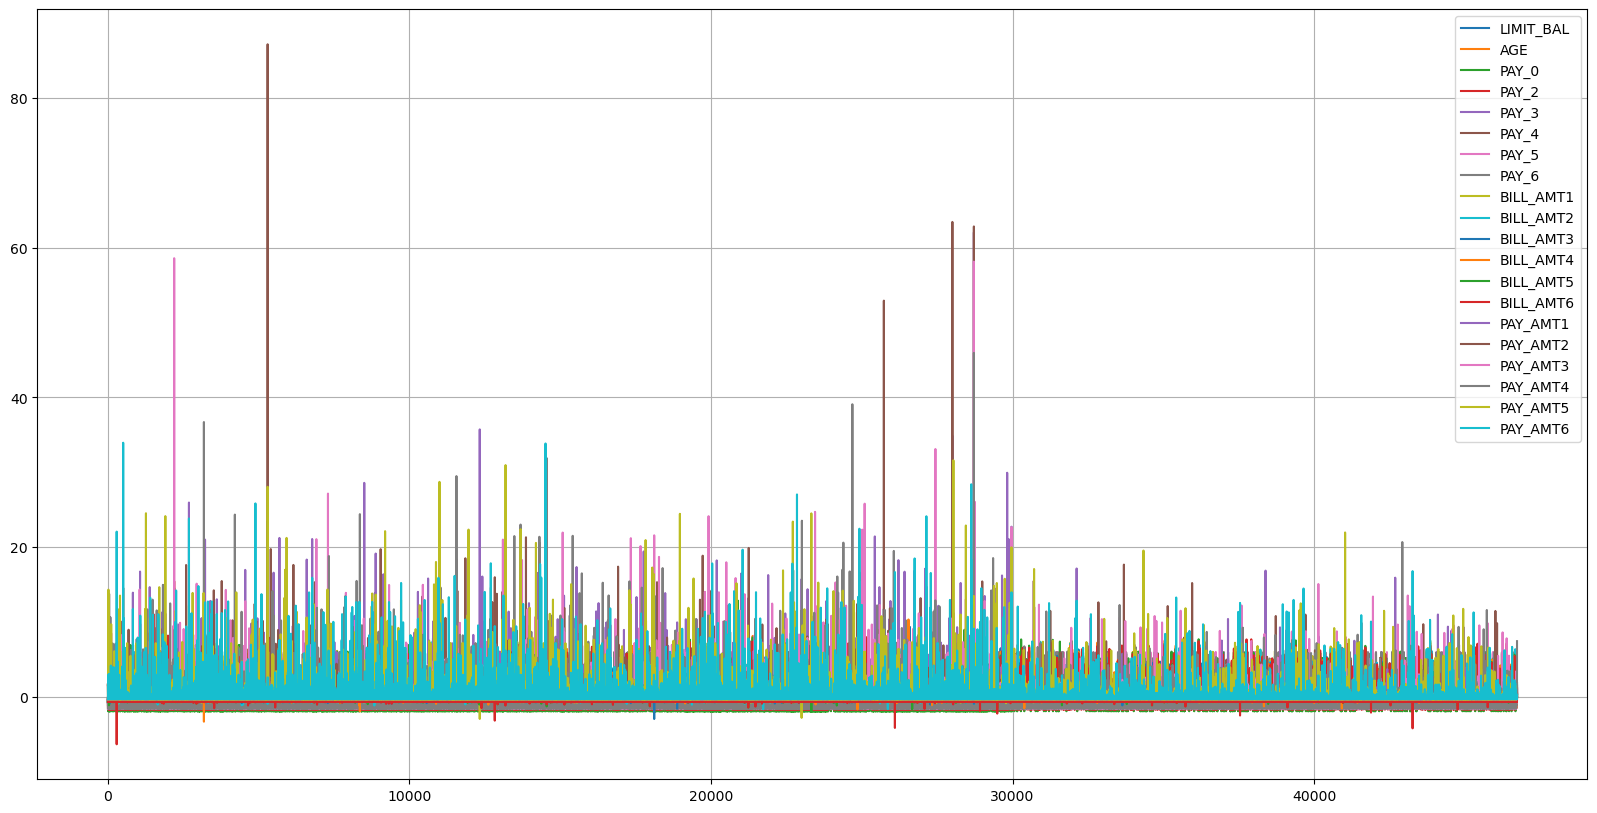

In [91]:
plt.figure(figsize=(20,10))
plt.plot(X)
plt.legend(X.columns)
plt.grid(True)
plt.show()

#### Question: Appliquer l'analyse en composante principale pour faire des représentations graphiques des données.

In [42]:
#ACP
from sklearn.decomposition import PCA

In [43]:
# ACP avec n_components=6


Sc=StandardScaler()
X=Sc.fit_transform(X)
model=PCA(n_components=22)
X_reduce=model.fit_transform(X)
X_reduce

array([[-1.89909907e+00, -9.44774158e-01, -3.78827719e-01, ...,
         6.10583468e-01, -7.68083546e-02,  1.24693720e-02],
       [-7.76113222e-01, -2.14828323e+00,  1.19900181e+00, ...,
         8.47690342e-01, -1.58101047e-01,  2.91089172e-03],
       [-8.58630440e-01, -1.11138452e+00,  5.17438774e-01, ...,
         2.93641823e-02,  8.60681396e-02, -8.79919391e-02],
       ...,
       [ 3.67808265e-01, -3.27268719e+00,  4.96564716e-01, ...,
        -7.45376864e-01, -6.30475241e-02,  2.60020397e-02],
       [ 6.61729006e-01,  7.62395660e-01,  3.66945865e-01, ...,
        -3.68307313e-01, -5.27614109e-01,  1.90567126e-01],
       [-1.34629853e-01, -7.69430102e-01, -1.43951287e+00, ...,
        -4.22492255e-02, -1.54268390e-01, -8.44328388e-03]])

In [44]:
 # pourcentage de variance pour chacune de nos composantes
model.explained_variance_ratio_*100

array([27.2638095 , 17.08315858,  6.47021412,  6.14084961,  4.36589546,
        4.10662145,  3.95654032,  3.78022055,  3.69692096,  3.62967815,
        3.24915245,  3.05323448,  2.84444117,  2.37887468,  2.18288989,
        1.67954885,  1.08267315,  1.03803529,  0.78585876,  0.54824689,
        0.29149811,  0.16985851])

In [45]:
# la somme cumulée de toute ces pourcentages
np.cumsum(model.explained_variance_ratio_*100)

array([27.2638095 , 44.34696808, 50.81718219, 56.9580318 , 61.32392727,
       65.43054871, 69.38708904, 73.16730958, 76.86423054, 80.49390869,
       83.74306114, 86.79629562, 89.64073679, 92.01961147, 94.20250136,
       95.8820502 , 96.96472336, 98.00275865, 98.78861741, 99.3368643 ,
       99.62836241, 99.79822092])

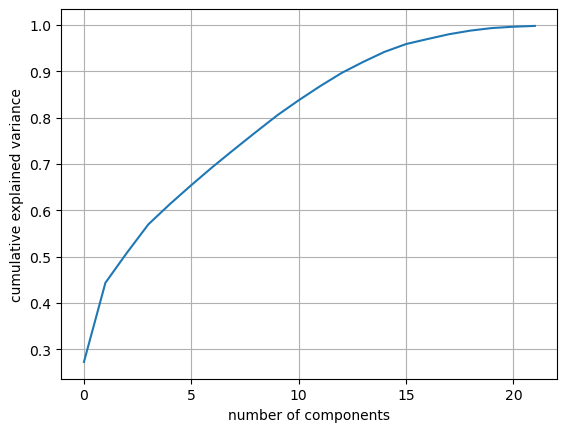

In [46]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

In [47]:
# pour identifier le nombre de composantes pour garder 90% de l'information
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.9)+1

14

In [48]:
# final model

Sc=StandardScaler()
X=Sc.fit_transform(X)
model=PCA(n_components=np.argmax(np.cumsum(model.explained_variance_ratio_)>0.9)+1)
X_reduce=model.fit_transform(X)
X_reduce

array([[-1.89909907, -0.94477416, -0.37882772, ...,  0.26029789,
         3.225044  , -1.05813095],
       [-0.77611322, -2.14828323,  1.19900181, ...,  0.15284185,
        -0.91954839,  0.06739189],
       [-0.85863044, -1.11138452,  0.51743877, ...,  0.05866517,
        -0.3138279 ,  0.50755778],
       ...,
       [ 0.36780826, -3.27268719,  0.49656472, ...,  0.16830622,
         3.31503916,  0.99253963],
       [ 0.66172901,  0.76239566,  0.36694587, ..., -4.27849674,
         0.69239359, -0.78583366],
       [-0.13462985, -0.7694301 , -1.43951287, ...,  0.00682891,
        -0.07026517, -0.49356156]])

In [44]:
X=model.inverse_transform(X_reduce)
X

array([[-1.29738754,  1.12391334, -1.14240838, ...,  1.00727349,
        -1.09876316, -0.16378851],
       [-0.56043354,  1.05397693, -0.9520422 , ..., -0.86551779,
         1.09444711, -0.12719535],
       [-0.42522871,  0.84277146, -0.74653211, ..., -0.66514053,
         0.84684563, -0.00684393],
       ...,
       [ 0.19362514, -1.26502582,  0.3036474 , ..., -0.7624109 ,
         0.67928561, -0.05825324],
       [ 0.27380841, -1.07367308,  0.37879723, ..., -0.05446902,
        -0.09444908, -0.10900595],
       [-0.07945721, -1.1243966 ,  1.10692456, ...,  0.95607939,
        -1.18253443, -0.10139226]])

#### Question 5:Extraire de `data` : les observations dans une variable`X` et les classes dans une variable `y`


In [7]:
X=data.drop(['default payment next month'],axis=1)
y=data[['default payment next month']]

In [19]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Create a RobustScaler object
scaler = StandardScaler()
# Transform and fit the selected features using the scaler
X_s=scaler.fit_transform(X)
X = pd.DataFrame(X_s, columns=X.columns)

In [24]:
X.mean()

LIMIT_BAL    6.993077e-15
SEX          7.267515e-14
EDUCATION    3.039546e-14
MARRIAGE    -1.141371e-13
AGE          3.612501e-16
PAY_0       -1.607662e-14
PAY_2        4.642968e-14
PAY_3       -1.284872e-14
PAY_4        1.496066e-14
PAY_5        3.145960e-14
PAY_6       -2.632376e-14
BILL_AMT1    2.134651e-16
BILL_AMT2    2.214886e-16
BILL_AMT3    2.123247e-16
BILL_AMT4    2.647828e-16
BILL_AMT5    2.694087e-16
BILL_AMT6    4.280066e-16
PAY_AMT1     1.662931e-15
PAY_AMT2    -8.581194e-16
PAY_AMT3    -3.577692e-15
PAY_AMT4     3.773304e-16
PAY_AMT5    -1.955587e-15
PAY_AMT6    -2.165622e-15
dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
#division X_train,X_test,y_train,y_test
#Gen Aleat = random_state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


(24000, 24)

#  MODELING

# K Nearest Neighbor(KNN)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### En utilisant la méthode GridSearchCV, identifier le meilleur nombre de voisin (tester les valeurs de $n_{neighbors}\in \{1,2,3...25\}$, ainsi que la meilleur distance à utiliser (tester les valeurs de $p\in \{1,2,3,4,5,6 \}$

In [41]:
knn = KNeighborsClassifier()
k_range = list(range(1, 25)) #Number of Clus
#param_grid = dict(n_neighbors=k_range)

param_grid = {
    'n_neighbors': list(range(1, 26)),
    'weights': ['uniform', 'distance'],
    
}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.8022576207127935


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [42]:
print(grid_search.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


In [43]:
# best score
grid.best_score_

0.8022576207127935

In [44]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [45]:
# modele final
final_model_knn=grid.best_estimator_

#### Créer une instance __`final_model_knn`__ de l'algorithme de classification par KNN en utilisant les meilleurs hyperparamètres trouvés dans la question précédente
#### Entrainer __`final_model_knn`__ sur le sous-ensemble de données approprié.

In [46]:
#y_pred 
y_pred=final_model_knn.predict(X_test)

In [47]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

#### Tracer la matrice de confusion de __`final_model_knn`__

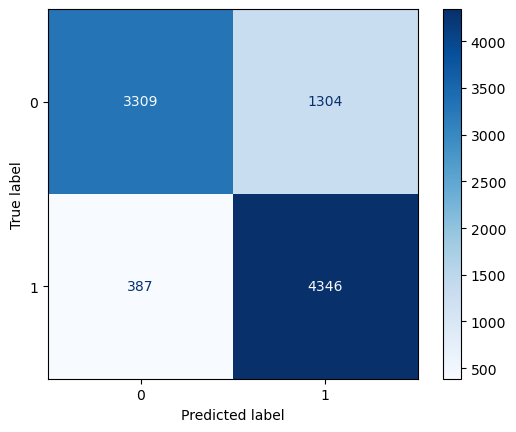

In [48]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(final_model_knn,X_test,y_test,cmap='Blues')

### Afficher le __`classification_report`__ de __`final_model_knn`__

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4613
           1       0.77      0.92      0.84      4733

    accuracy                           0.82      9346
   macro avg       0.83      0.82      0.82      9346
weighted avg       0.83      0.82      0.82      9346



# Pour les autres algoritmes vous allez suivre pratiquement le meme raisonnement.

# Decision Tree

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
param_g={'criterion':['gini', 'entropy'],
         'max_depth':np.arange(1,19),
         'splitter': ['random', 'best']
        }

#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question précédente. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [28]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_g,cv = 5)
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'splitter': ['random', 'best']})

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 17, 'splitter': 'best'}

In [30]:
grid.best_score_

0.7500671043062467

In [31]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=17, random_state=0)

#### Créer une instance __`final_model_dt`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question précédente

In [32]:
final_model=grid.best_estimator_

In [33]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17, random_state=0)

#### Afficher l'arbre de décision

In [33]:
features = [  ]

In [34]:
class_names=['Yes','No']

In [40]:
from sklearn.tree import plot_tree

final_model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(final_model,class_names=class_names, filled=True, fontsize=10)
plt.show()

NameError: name 'class_names' is not defined

<Figure size 2000x1000 with 0 Axes>

#### Afficher l'arbre sous forme de régles de décision

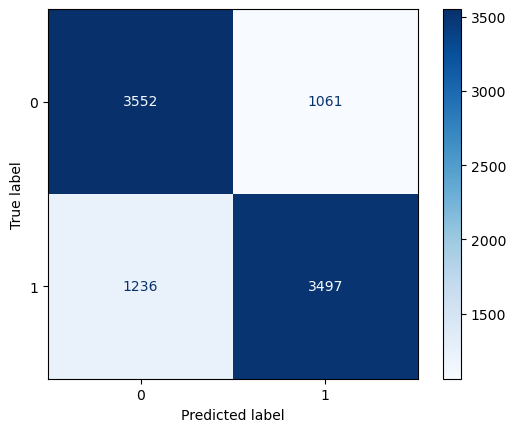

In [34]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(final_model,X_test,y_test,cmap='Blues')

#### Tracer la matrice de confusion de __`final_model_dt`__

### Afficher le __`classification_report`__ de __`final_model_dt`__

In [35]:
y_pred=final_model.predict(X_test)

In [36]:
# rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      4613
           1       0.77      0.74      0.75      4733

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



# LogisticRegression

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [50]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression

In [51]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)

In [52]:
param_grid = {
     'C' : np.linspace(-4, 4, 20),
     'penalty': ['l1', 'l2'],
     'max_iter' : [100, 1000,2500, 5000]
             }

In [53]:
#Créer une instance de recherche par grille appliquée sur l'algorithme de classification par regression logistique
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(log,param_grid,cv=5)

In [54]:
# entrainer le modele
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2']})

In [55]:
grid.best_params_

{'C': 1.8947368421052628, 'max_iter': 1000, 'penalty': 'l2'}

In [56]:
model_final=grid.best_estimator_

In [57]:
model_final.fit(X_train,y_train)

LogisticRegression(C=1.8947368421052628, max_iter=1000, random_state=0)

#### Tracer la matrice de confusion de __`....`__

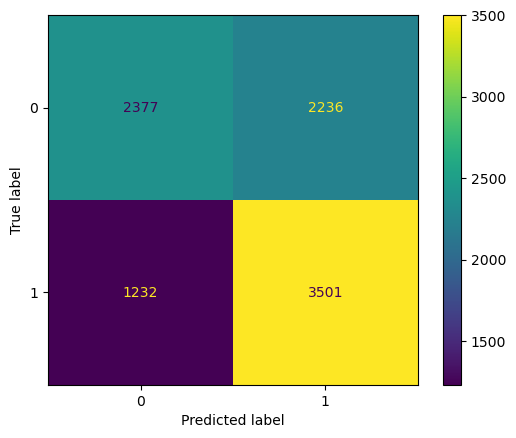

In [58]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(model_final,X_test,y_test)

### Afficher le __`classification_report`__ de __`....`__

In [59]:
# rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4613
           1       0.77      0.92      0.84      4733

    accuracy                           0.82      9346
   macro avg       0.83      0.82      0.82      9346
weighted avg       0.83      0.82      0.82      9346



# GaussianNB (Gaussian Naive Bayes)

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [60]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB

#### Créer une instance __`model`__ de l'algorithme de classification par GaussianNB.
#### Entrainer __`model`__ sur le sous-ensemble de données approprié.

In [61]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [62]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes classifier
gNB = GaussianNB()

In [63]:
from sklearn.model_selection import GridSearchCV
# Create a GridSearchCV object
grid = GridSearchCV(gNB, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [64]:
grid.best_params_

{'var_smoothing': 1e-09}

In [65]:
grid.best_score_

0.5464661630784557

#### Tracer la matrice de confusion de __`model`__

In [66]:
# modele final
model_final=grid.best_estimator_

In [67]:
# entrainer le modele final
model_final.fit(X_train,y_train)

GaussianNB()

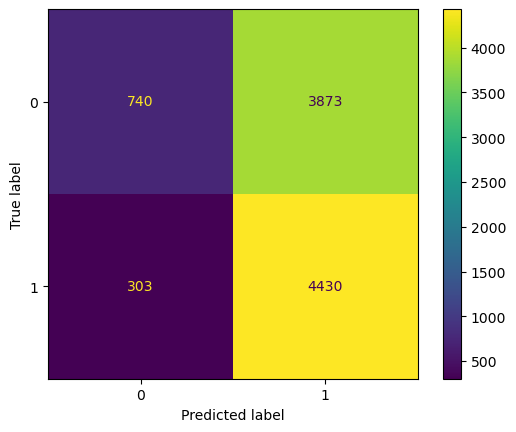

In [68]:
#y_pred 
y_pred=model_final.predict(X_test)
from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(model_final,X_test,y_test)

In [69]:
# rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.16      0.26      4613
           1       0.53      0.94      0.68      4733

    accuracy                           0.55      9346
   macro avg       0.62      0.55      0.47      9346
weighted avg       0.62      0.55      0.47      9346



### Afficher le __`classification_report`__ de __`model`__

# SVM

In [71]:
from sklearn.svm import SVC

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Define the SVM classifier with pipeline
svc=SVC(kernel='linear')

In [73]:
params = {
    'C': [0.1, 1, 10],
}



In [ ]:
# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(svc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid.best_score_

In [ ]:
# modele final
model_final=grid.best_estimator_

In [ ]:
# entrainer le modele final
model_final.fit(X_train,y_train)

In [ ]:
#y_pred 

from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(model_final,X_test,y_test,cmap='Blues')

In [ ]:
y_pred=final_model.predict(X_test)
# rapport de classification
print(classification_report(y_test,y_pred))

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [11]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth':np.arange(1,19),
}

In [12]:
rf = RandomForestClassifier()

In [13]:
# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'n_estimators': [50, 100, 200]})

In [14]:
grid_search.best_params_

{'max_depth': 18, 'n_estimators': 200}

In [15]:
grid_search.best_score_

0.8232302907443

In [16]:
final_model1=grid_search.best_estimator_
final_model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, n_estimators=200)

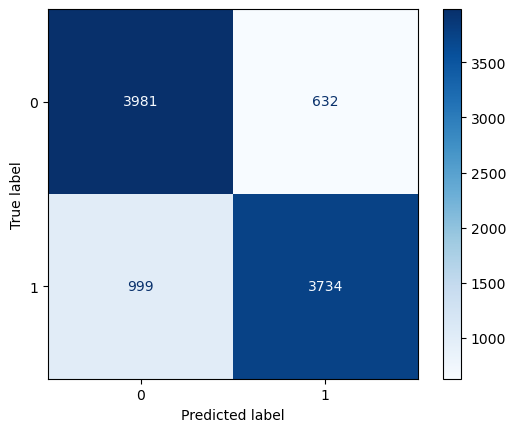

In [17]:
from sklearn.metrics import plot_confusion_matrix, classification_report
# matrices de confusion
plot_confusion_matrix(final_model1,X_test,y_test,cmap='Blues')

In [18]:
y_pred=final_model1.predict(X_test)
# rapport de classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4613
           1       0.86      0.79      0.82      4733

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



# XGBoost

In [56]:
from xgboost import XGBClassifier

In [57]:
# Importer le modèle
clf = XGBClassifier(random_state=0)



In [58]:
# Créer un dictionnaire param_grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10]}

In [59]:

# Créer une instance de recherche par grille appliquée sur l'algorithme
grid_search = GridSearchCV(clf, param_grid)

In [60]:
# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [65]:
# Créer une instance final_model_xgb de l'algorithme XGBoost en utilisant les meilleurs hyperparamètres
final_model_xgb = grid_search.best_estimator_


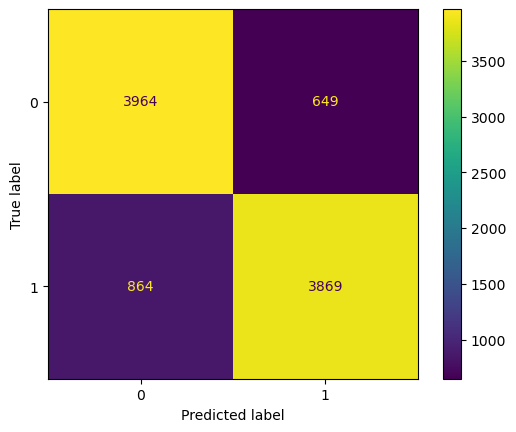

In [66]:
# Tracer la matrice de confusion pour les prédictions du modèle sur les données de test
plot_confusion_matrix(final_model_xgb, X_test, y_test)
plt.show()

In [63]:
# Afficher le classification_report pour les prédictions du modèle sur les données de test
y_pred = final_model_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4613
           1       0.86      0.82      0.84      4733

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

# Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
# Importer le modèle
clf = MLPClassifier(random_state=0)



In [95]:
# Créer un dictionnaire param_grid
param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)], 'activation': ['logistic', 'tanh', 'relu']}


In [96]:
# Créer une instance de recherche par grille appliquée sur l'algorithme
grid_search = GridSearchCV(clf, param_grid)


In [97]:
# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)]})

In [98]:
# Afficher les meilleures valeurs des hyperparamètres réglés
print(grid_search.best_params_)


{'activation': 'relu', 'hidden_layer_sizes': (100,)}


In [99]:
# Créer une instance final_model_nn de l'algorithme de réseau de neurones en utilisant les meilleurs hyperparamètres
final_model_nn = grid_search.best_estimator_


In [100]:
# Afficher le modèle
print(final_model_nn)


MLPClassifier(random_state=0)


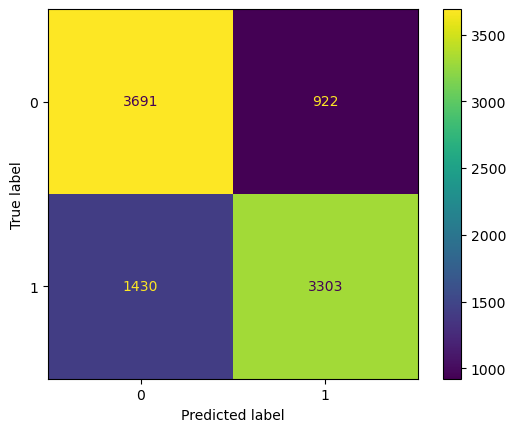

In [101]:
# Tracer la matrice de confusion pour les prédictions du modèle sur les données de test
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(final_model_nn, X_test, y_test)
plt.show()


In [102]:
# Afficher le classification_report pour les prédictions du modèle sur les données de test
y_pred = final_model_nn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      4613
           1       0.78      0.70      0.74      4733

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



# Etude compartive

| Algorithm          | weighted_avg_recall | weighted_avg_precsion | weighted_avg_F1-score|
|--------------------|---------------------|-----------------------|----------------------|
| KNN                | ?                   | ?                     | ?                    |
| Decision Tree      | ?                   | ?                     | ?                    |
| GaussianNB         | ?                   | ?                     | ?                    |
| LogisticRegression | ?                   | ?                     | ?                    |
| SVM                | ?                   | ?                     | ?                    |
| Random Forest      | ?                   | ?                     | ?                    |
| XGBOOST            | ?                   | ?                     | ?                    |
| Neural Network     | ?                   | ?                     | ?                    |

# Courbe Roc et Auc